# Predicting survival on Titanic



In [1]:
# importing libraries
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# load data:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]

In [2]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Wrangling

In [8]:
# to replace null values to age group, we use title attached to the 'name' column to estimate age
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [9]:
# to assign values to age groups
for dataset in combine:
    dataset.loc[ dataset['Age'] <=4, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 4) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 50), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 75), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 75, 'Age'] = 4
    

In [10]:
# title mapping
title_mapping = {"Mr": 2, "Miss": 1, "Mrs": 2, "Master": 1, "Dr": 2, "Rev": 2, "Col": 2, "Major": 2, "Mlle": 2, "Capt": 2, 
                 "Sir": 2, "Countess": 2, "Lady": 2, "Johnkeer": 2, "Ms": 1, "Don": 2, "Mme": 2, "Dona": 2,}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [11]:
# to replace null values in Age with median age for each Title
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            1
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
# we use the mode ('S') to replace null values in Embarked
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [16]:
test['Fare'].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [17]:
# we use the mode to replace null values in Fare
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(7.75)

In [18]:
test['Title'].value_counts()

2    318
1    100
Name: Title, dtype: int64

In [19]:
# we use the median to replace null values in mode
for dataset in combine:
    dataset['Title'] = dataset['Title'].fillna(2)

In [20]:
# to assign values to fare
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    

In [21]:
# embarked mapping
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [22]:
# sex mapping
sex_mapping = {"male": 1, "female": 0}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [23]:
# we enginner another feature combining numbers of people that have spouses and also family travelling with them
for dataset in combine:
    dataset['Relation'] = dataset['SibSp'] + dataset['Parch']

In [24]:
# we enginner another feature combining sex and class, the less the value feature, the higher chance of survival
for dataset in combine:
    dataset['Edge'] = dataset['Sex'] + dataset['Pclass']

In [25]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Relation         0
Edge             0
dtype: int64

In [26]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
Relation         0
Edge             0
dtype: int64

In [27]:
"""delete features we do not need from the dataset,
we drop the Cabin because it has large null value and 
Pclass can give us information about it"""

test_id = test['PassengerId'] #we copy to use for submission
features_drop = ['Name', 'Cabin', 'Ticket', 'PassengerId']
train.drop(features_drop, axis=1, inplace=True)
test.drop(features_drop, axis=1, inplace=True)

In [28]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Relation,Edge
0,0,3,1,2.0,1,0,0.0,0,2.0,1,4
1,1,1,0,2.0,1,0,3.0,1,2.0,1,1
2,1,3,0,2.0,0,0,1.0,0,1.0,0,3
3,1,1,0,2.0,1,0,3.0,0,2.0,1,1
4,0,3,1,2.0,0,0,1.0,0,2.0,0,4


## Visual Analysis

In [29]:
#creating a function to use for chart
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=False, figsize=(10,5))
    

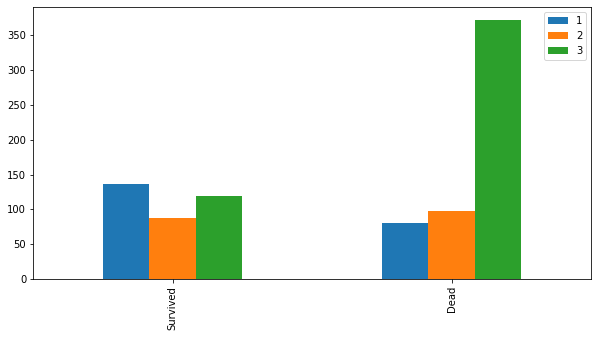

In [30]:
bar_chart('Pclass')

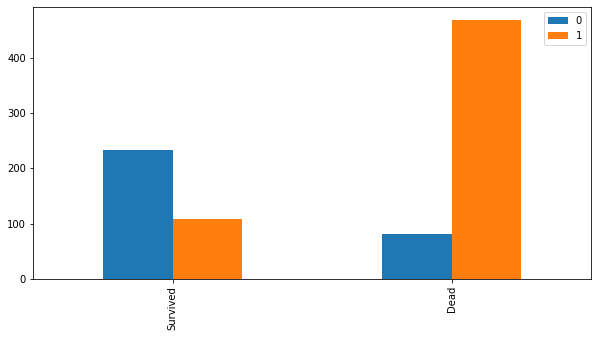

In [31]:
bar_chart('Sex')

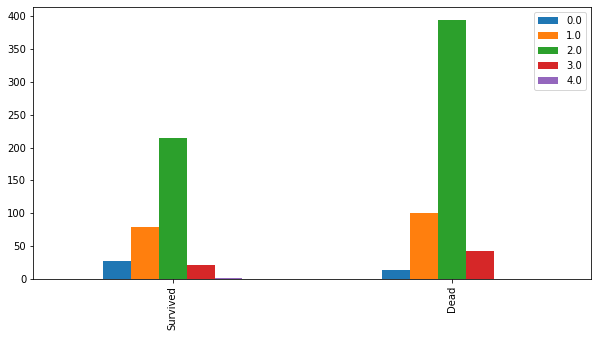

In [32]:
bar_chart('Age')

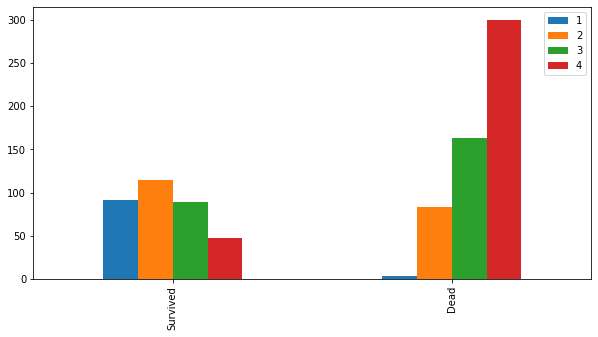

In [33]:
bar_chart('Edge')

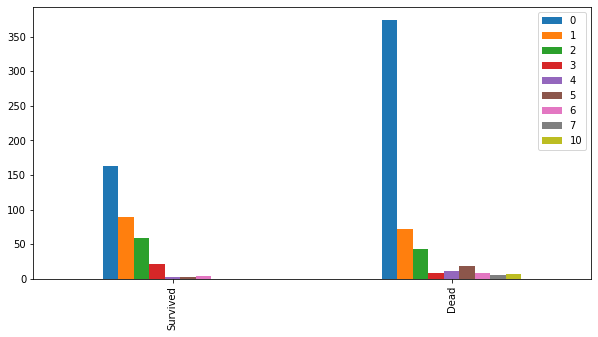

In [34]:
bar_chart('Relation')

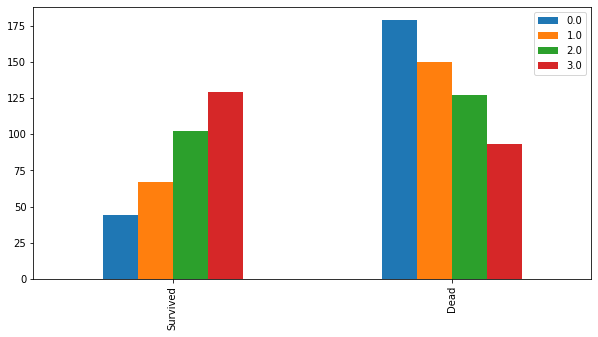

In [35]:
bar_chart('Fare')

In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Relation,Edge
0,0,3,1,2.0,1,0,0.0,0,2.0,1,4
1,1,1,0,2.0,1,0,3.0,1,2.0,1,1
2,1,3,0,2.0,0,0,1.0,0,1.0,0,3
3,1,1,0,2.0,1,0,3.0,0,2.0,1,1
4,0,3,1,2.0,0,0,1.0,0,2.0,0,4


In [37]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Relation,Edge
0,3,1,2.0,0,0,0.0,2,2,0,4
1,3,0,2.0,1,0,0.0,0,2,1,3
2,2,1,3.0,0,0,1.0,2,2,0,3
3,3,1,2.0,0,0,1.0,0,2,0,4
4,3,0,2.0,1,1,1.0,0,2,2,3


# Modeling

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    float64
 9   Relation  891 non-null    int64  
 10  Edge      891 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 76.7 KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Title     418 non-null    int64  
 8   Relation  418 non-null    int64  
 9   Edge      418 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 32.8 KB


In [40]:
trained = train.drop('Survived', axis=1)
target = train['Survived']
trained.shape, target.shape

((891, 10), (891,))

In [41]:
# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=42)


In [42]:
# kNN
knn = KNeighborsClassifier(n_neighbors = 10)
scoring = 'accuracy'
score = cross_val_score(knn, trained, target, cv=kfold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.83146067 0.78651685 0.84269663 0.82022472 0.85393258
 0.7752809  0.79775281 0.75280899 0.91011236]


In [43]:
#kNN Score
round(np.mean(score)*100, 2)

82.04

In [44]:
# Tree
tree = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(tree, trained, target, cv=kfold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.84269663 0.79775281 0.83146067 0.83146067 0.86516854
 0.80898876 0.79775281 0.7752809  0.8988764 ]


In [45]:
#Tree Score
round(np.mean(score)*100, 2)

82.61

In [46]:
# Forest
rf =RandomForestClassifier(n_estimators=100)
scoring = 'accuracy'
score = cross_val_score(rf, trained, target, cv=kfold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.83146067 0.79775281 0.83146067 0.83146067 0.84269663
 0.82022472 0.80898876 0.76404494 0.88764045]


In [47]:
#Forest Score
round(np.mean(score)*100, 2)

82.27

In [48]:
# Naive
naive =GaussianNB()
scoring = 'accuracy'
score = cross_val_score(naive, trained, target, cv=kfold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.79775281 0.82022472 0.75280899 0.78651685 0.82022472
 0.78651685 0.79775281 0.74157303 0.80898876]


In [49]:
#Naive Score
round(np.mean(score)*100, 2)

79.12

In [50]:
# Xgb Score
xgb =xgb.XGBClassifier()
scoring = 'accuracy'
score = cross_val_score(xgb, trained, target, cv=kfold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.85393258 0.78651685 0.83146067 0.83146067 0.86516854
 0.79775281 0.79775281 0.82022472 0.86516854]


In [51]:
#Xgb Score
round(np.mean(score)*100, 2)

82.72

In [52]:
# SVC
svc =SVC(C=0.9)
scoring = 'accuracy'
score = cross_val_score(svc, trained, target, cv=kfold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.79775281 0.85393258 0.79775281 0.87640449 0.86516854
 0.7752809  0.79775281 0.75280899 0.88764045]


In [53]:
#SVC Score
round(np.mean(score)*100, 2)

82.49

# Prediction

In [54]:
#I will predict using SVC
svc.fit(trained,target)
prediction=svc.predict(test)

In [55]:
submission = pd.DataFrame({
        'PassengerId': test_id,
        'Survived': prediction
    })

submission.to_csv('submission.csv', index=False)

In [56]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
